In [1]:
import os
import csv
import random
import statsmodels.api as sm
import statsmodels.formula.api as smf
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.preprocessing import MinMaxScaler

/home/michael/anaconda3/lib/python3.6/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
train_df = pd.read_csv('H1full.csv')
a=train_df.head()
b=train_df
b
b.sort_values(['ArrivalDateYear','ArrivalDateWeekNumber'], ascending=True)

,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,...,DepositType,Agent,Company,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatus,ReservationStatusDate
0,0,342,2015,July,27,1,0,0,2,0,...,No Deposit,NULL,NULL,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,0,737,2015,July,27,1,0,0,2,0,...,No Deposit,NULL,NULL,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,0,7,2015,July,27,1,0,1,1,0,...,No Deposit,NULL,NULL,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,0,13,2015,July,27,1,0,1,1,0,...,No Deposit,304,NULL,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,0,14,2015,July,27,1,0,2,2,0,...,No Deposit,240,NULL,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40055,0,212,2017,August,35,31,2,8,2,1,...,No Deposit,143,NULL,0,Transient,89.75,0,0,Check-Out,2017-09-10
40056,0,169,2017,August,35,30,2,9,2,0,...,No Deposit,250,NULL,0,Transient-Party,202.27,0,1,Check-Out,2017-09-10
40057,0,204,2017,August,35,29,4,10,2,0,...,No Deposit,250,NULL,0,Transient,153.57,0,3,Check-Out,2017-09-12
40058,0,211,2017,August,35,31,4,10,2,0,...,No Deposit,40,NULL,0,Contract,112.80,0,1,Check-Out,2017-09-14


In [3]:
IsCanceled = train_df['IsCanceled']
y = IsCanceled

In [4]:
leadtime = train_df['LeadTime']
arrivaldateyear = train_df['ArrivalDateYear']
arrivaldateweekno = train_df['ArrivalDateWeekNumber']
arrivaldatedayofmonth = train_df['ArrivalDateDayOfMonth']
staysweekendnights = train_df['StaysInWeekendNights']
staysweeknights = train_df['StaysInWeekNights']
adults = train_df['Adults']
children = train_df['Children']
babies = train_df['Babies']
isrepeatedguest = train_df['IsRepeatedGuest'] 
previouscancellations = train_df['PreviousCancellations']
previousbookingsnotcanceled = train_df['PreviousBookingsNotCanceled']
bookingchanges = train_df['BookingChanges']
agent = train_df['Agent']
company = train_df['Company']
dayswaitinglist = train_df['DaysInWaitingList']
adr = train_df['ADR']
rcps = train_df['RequiredCarParkingSpaces']
totalsqr = train_df['TotalOfSpecialRequests']

In [5]:
# Categorical variables
arrivaldatemonth = train_df.ArrivalDateMonth.astype("category").cat.codes
arrivaldatemonthcat=pd.Series(arrivaldatemonth)
mealcat=train_df.Meal.astype("category").cat.codes
mealcat=pd.Series(mealcat)
countrycat=train_df.Country.astype("category").cat.codes
countrycat=pd.Series(countrycat)
marketsegmentcat=train_df.MarketSegment.astype("category").cat.codes
marketsegmentcat=pd.Series(marketsegmentcat)
distributionchannelcat=train_df.DistributionChannel.astype("category").cat.codes
distributionchannelcat=pd.Series(distributionchannelcat)
reservedroomtypecat=train_df.ReservedRoomType.astype("category").cat.codes
reservedroomtypecat=pd.Series(reservedroomtypecat)
assignedroomtypecat=train_df.AssignedRoomType.astype("category").cat.codes
assignedroomtypecat=pd.Series(assignedroomtypecat)
deposittypecat=train_df.DepositType.astype("category").cat.codes
deposittypecat=pd.Series(deposittypecat)
customertypecat=train_df.CustomerType.astype("category").cat.codes
customertypecat=pd.Series(customertypecat)
reservationstatuscat=train_df.ReservationStatus.astype("category").cat.codes
reservationstatuscat=pd.Series(reservationstatuscat)

In [6]:
x = np.column_stack((leadtime,arrivaldateyear,arrivaldatemonthcat,arrivaldateweekno,arrivaldatedayofmonth,staysweekendnights,staysweeknights,adults,children,babies,mealcat,countrycat,marketsegmentcat,distributionchannelcat,isrepeatedguest,previouscancellations,previousbookingsnotcanceled,reservedroomtypecat,assignedroomtypecat,bookingchanges,deposittypecat,dayswaitinglist,customertypecat,adr,rcps,totalsqr,reservationstatuscat))
x = sm.add_constant(x, prepend=True)

In [7]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(x, y)
print(model.feature_importances_)

[0.00000000e+00 2.16609603e-02 5.62120324e-03 2.91500156e-03
 4.38806126e-03 2.95246028e-03 3.85004755e-03 3.40438902e-03
 2.90825082e-03 2.42425603e-03 2.75640801e-04 2.86764024e-03
 3.49429948e-02 1.31665304e-02 8.40053830e-03 4.15326353e-03
 8.38522085e-03 9.27857459e-04 4.34812696e-03 7.10846448e-03
 4.09683176e-03 3.95478413e-02 5.35710263e-04 1.10625034e-02
 7.46191506e-03 2.12638613e-02 6.02648493e-03 7.75303944e-01]


In [8]:
ext=pd.DataFrame(model.feature_importances_,columns=["extratrees"])
ext
ext.sort_values(['extratrees'], ascending=True)

,extratrees
0,0.000000
10,0.000276
22,0.000536
17,0.000928
9,0.002424
11,0.002868
8,0.002908
3,0.002915
5,0.002952
7,0.003404


In [9]:
y1 = y
x1 = np.column_stack((leadtime,countrycat,deposittypecat,arrivaldateyear,arrivaldatemonthcat,arrivaldateweekno,arrivaldatedayofmonth))
x1 = sm.add_constant(x1, prepend=True)

In [10]:
y1

0        0
1        0
2        0
3        0
4        0
        ..
40055    0
40056    0
40057    0
40058    0
40059    0
Name: IsCanceled, Length: 40060, dtype: int64

In [11]:
x1

array([[  1., 342.,  95., ...,   5.,  27.,   1.],
       [  1., 737.,  95., ...,   5.,  27.,   1.],
       [  1.,   7.,  45., ...,   5.,  27.,   1.],
       ...,
       [  1., 204.,  55., ...,   1.,  35.,  29.],
       [  1., 211.,  45., ...,   1.,  35.,  31.],
       [  1., 161.,  33., ...,   1.,  35.,  31.]])

In [12]:
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, random_state=0)

In [13]:
from sklearn import svm
clf = svm.SVC(gamma='scale', 
            class_weight='balanced')
clf.fit(x1, y1)  
prclf = clf.predict(x1_test)
prclf

array([1, 1, 1, ..., 0, 1, 1])

In [14]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
falsepos,truepos,thresholds=roc_curve(y1_test,clf.decision_function(x1_test))

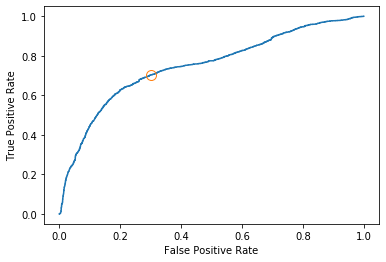

In [15]:
falseposc,trueposc,thresholdsc=roc_curve(y1_test,clf.decision_function(x1_test))
plt.plot(falseposc,trueposc,label="ROC")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

cutoff=np.argmin(np.abs(thresholdsc))
plt.plot(falseposc[cutoff],trueposc[cutoff],'o',markersize=10,label="cutoff",fillstyle="none")
plt.show()

In [16]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y1_test,prclf))
print(classification_report(y1_test,prclf))

[[5079 2187]
 [ 815 1934]]
              precision    recall  f1-score   support

           0       0.86      0.70      0.77      7266
           1       0.47      0.70      0.56      2749

    accuracy                           0.70     10015
   macro avg       0.67      0.70      0.67     10015
weighted avg       0.75      0.70      0.71     10015



In [17]:
h2data = pd.read_csv('H2full.csv')
a=h2data.head()
a

,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,...,DepositType,Agent,Company,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatus,ReservationStatusDate
0,0,6,2015,July,27,1,0,2,1,0.0,...,No Deposit,6,NULL,0,Transient,0.0,0,0,Check-Out,2015-07-03
1,1,88,2015,July,27,1,0,4,2,0.0,...,No Deposit,9,NULL,0,Transient,76.5,0,1,Canceled,2015-07-01
2,1,65,2015,July,27,1,0,4,1,0.0,...,No Deposit,9,NULL,0,Transient,68.0,0,1,Canceled,2015-04-30
3,1,92,2015,July,27,1,2,4,2,0.0,...,No Deposit,9,NULL,0,Transient,76.5,0,2,Canceled,2015-06-23
4,1,100,2015,July,27,2,0,2,2,0.0,...,No Deposit,9,NULL,0,Transient,76.5,0,1,Canceled,2015-04-02


In [18]:
type(h2data)

pandas.core.frame.DataFrame

In [19]:
t_leadtime = h2data['LeadTime'] #1
t_arrivaldateyear = h2data['ArrivalDateYear']
t_arrivaldateweekno = h2data['ArrivalDateWeekNumber']
t_arrivaldatedayofmonth = h2data['ArrivalDateDayOfMonth']
t_staysweekendnights = h2data['StaysInWeekendNights'] #2
t_staysweeknights = h2data['StaysInWeekNights'] #3
t_adults = h2data['Adults'] #4
t_children = h2data['Children'] #5
t_babies = h2data['Babies'] #6
t_isrepeatedguest = h2data['IsRepeatedGuest'] #11
t_previouscancellations = h2data['PreviousCancellations'] #12
t_previousbookingsnotcanceled = h2data['PreviousBookingsNotCanceled'] #13
t_bookingchanges = h2data['BookingChanges'] #16
t_agent = h2data['Agent'] #18
t_company = h2data['Company'] #19
t_dayswaitinglist = h2data['DaysInWaitingList'] #20
t_adr = h2data['ADR'] #22
t_rcps = h2data['RequiredCarParkingSpaces'] #23
t_totalsqr = h2data['TotalOfSpecialRequests'] #24

In [20]:
# Categorical variables
t_arrivaldatemonth = h2data.ArrivalDateMonth.astype("category").cat.codes
t_arrivaldatemonthcat = pd.Series(t_arrivaldatemonth)
t_mealcat=h2data.Meal.astype("category").cat.codes
t_mealcat=pd.Series(t_mealcat)
t_countrycat=h2data.Country.astype("category").cat.codes
t_countrycat=pd.Series(t_countrycat)
t_marketsegmentcat=h2data.MarketSegment.astype("category").cat.codes
t_marketsegmentcat=pd.Series(t_marketsegmentcat)
t_distributionchannelcat=h2data.DistributionChannel.astype("category").cat.codes
t_distributionchannelcat=pd.Series(t_distributionchannelcat)
t_reservedroomtypecat=h2data.ReservedRoomType.astype("category").cat.codes
t_reservedroomtypecat=pd.Series(t_reservedroomtypecat)
t_assignedroomtypecat=h2data.AssignedRoomType.astype("category").cat.codes
t_assignedroomtypecat=pd.Series(t_assignedroomtypecat)
t_deposittypecat=h2data.DepositType.astype("category").cat.codes
t_deposittypecat=pd.Series(t_deposittypecat)
t_customertypecat=h2data.CustomerType.astype("category").cat.codes
t_customertypecat=pd.Series(t_customertypecat)
t_reservationstatuscat=h2data.ReservationStatus.astype("category").cat.codes
t_reservationstatuscat=pd.Series(t_reservationstatuscat)

In [21]:
a = np.column_stack((t_leadtime,t_countrycat,t_deposittypecat,t_arrivaldateyear,t_arrivaldatemonthcat,t_arrivaldateweekno,t_arrivaldatedayofmonth))
a = sm.add_constant(a, prepend=True)
IsCanceled = h2data['IsCanceled']
b = IsCanceled
b=b.values

In [22]:
prh2 = clf.predict(a)
prh2

array([1, 1, 1, ..., 0, 0, 0])

In [23]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(b,prh2))
print(classification_report(b,prh2))

[[26804 19424]
 [ 8840 24262]]
              precision    recall  f1-score   support

           0       0.75      0.58      0.65     46228
           1       0.56      0.73      0.63     33102

    accuracy                           0.64     79330
   macro avg       0.65      0.66      0.64     79330
weighted avg       0.67      0.64      0.65     79330



## Memory Usage

In [24]:
# https://stackoverflow.com/questions/276052/how-to-get-current-cpu-and-ram-usage-in-python

import os
import psutil
pid = os.getpid()
py = psutil.Process(pid)
memoryUse = py.memory_info()[0]/2.**30
memoryUse

0.40308380126953125